#### TorchVision에서 Fashion-MNIST 데이터셋을 로드하는 방법의 예시
* root는 훈련/테스트 데이터가 저장된 경로입니다
* train은 훈련 또는 테스트 데이터셋을 지정합니다
* download=true는 루트에서 데이터를 사용할 수 없는 경우 인터넷에서 데이터를 다운로드합니다
* transform 및 target_transform은 특징 및 레이블 변환을 지정합니다

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="/tmp/data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="/tmp/data",
    train=False,
    download=True,
    transform=ToTensor()
)

#### 데이터 세트 반복 및 시각화하기
* training_data[index]와 같이 수동으로 데이터셋을 리스트처럼 인덱싱할 수 있습니다.
* 훈련 데이터의 일부 샘플을 시각화하기 위해 matplotlib를 사용합니다.

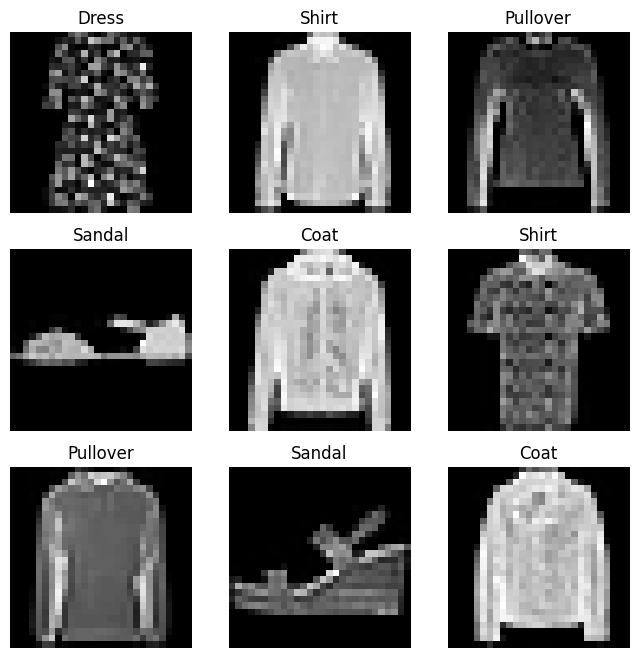

In [2]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

#### 파일에 대한 사용자 지정 데이터 집합 만들기

In [3]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):  # 사용자 정의 데이터셋 클래스
    # __init__
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    # __len__
    def __len__(self):
        return len(self.img_labels)

    # __getItem__
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

#### __init__
* __init__ 함수는 데이터셋 오브젝트를 인스턴스화할 때 한 번 실행
* 이미지, 주석 파일, 두 트랜스폼이 포함된 디렉토리를 초기화합니다

In [4]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

#### __len__
* __len__ 함수는 데이터셋의 샘플 수를 반환합니다.

In [5]:
def __len__(self):
    return len(self.img_labels)

#### __getitem__
* _getitem__ 함수는 주어진 인덱스 idx의 데이터셋에서 샘플을 로드하고 반환합니다.
* read_image를 사용하여 텐서로 변환
* self.img_labels의 csv 데이터에서 해당 레이블을 검색

In [6]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

#### 데이터로더로 학습을 위한 데이터 준비하기

In [7]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

#### 데이터로더를 통한 반복

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


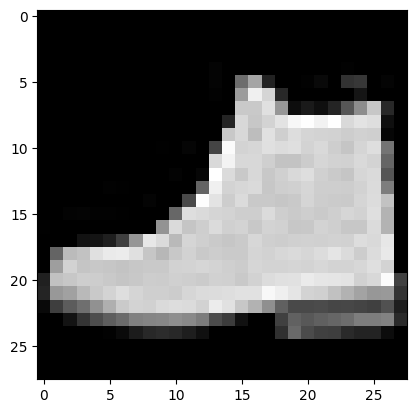

Label: 9


In [9]:
# 이미지와 레이블을 출력한다.
train_features, train_labels = next(iter(train_dataloader)) # next()를 통해 이터레이터의 값을 순회하며 하나 꺼낸다.
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")